In [1]:
import numpy as np
import os
import cv2 
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=[12,8]

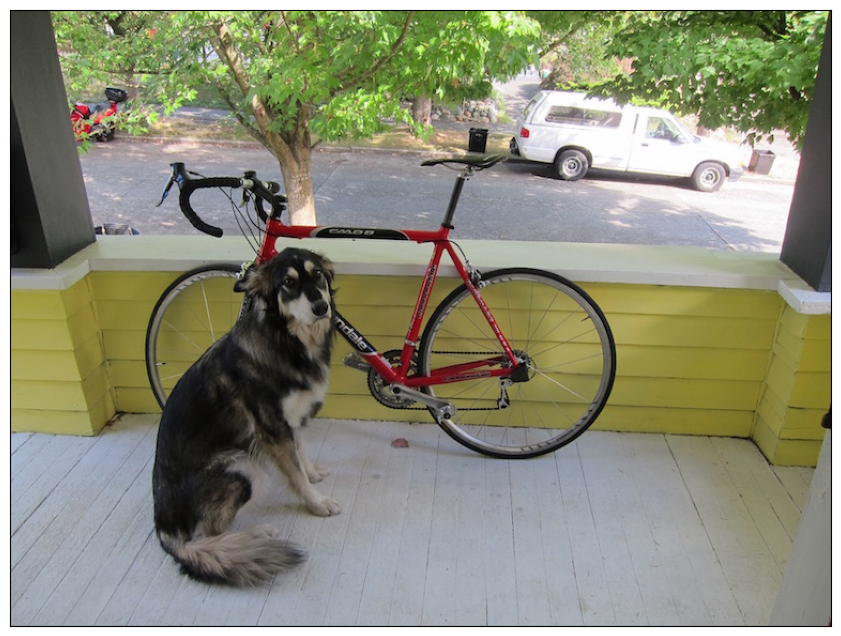

In [2]:
# Reading the image file
test_img = cv2.imread("S:/Jupyter_Notebooks/Object Detection/dog.jpg")
img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

# Plotting the image
def plot_image(img, cmap=None):
    plt.imshow(img, cmap=cmap)
    plt.xticks([])
    plt.yticks([])
    
plot_image(img)
plt.show()

In [3]:
# Converting to blob object

scalefactor = 1.0/255.0
new_size = (416, 416)
blob = cv2.dnn.blobFromImage(test_img, scalefactor, new_size, swapRB=True, crop=False)

In [16]:
# define class labels
class_labels_path = "S:/Python-Anaconda/Anaconda/pkgs/darknet-yolov4-0.0.1-hd8ed1ab_0/models/darknet/yolov4/yolov4.labels"
class_labels = open(class_labels_path).read().strip().split("\n")
class_labels

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [17]:
# declare repeating bounding box colors for each class 
class_colors = ["255,0,0","0,255,0","0,0,255","255,155,0","255,0, 255"]
 
#2nd: split the array on comma-separated strings and for change each string type to integer
class_colors = [np.array(every_color.split(",")).astype("int") for every_color in class_colors]
 
#3rd: convert the array or arrays to a numpy array
class_colors = np.array(class_colors)
 
#4th: tile this to get 80 class colors 
class_colors = np.tile(class_colors,(16,1))

def colored(r, g, b, text):
    return "\033[38;2;{};{};{}m{} \033[38;2;255;255;255m".format(r, g, b, text)
 
for i in range(16):
    line = ""
    for j in range(5):
        class_id = i*5 + j
        class_id_str = str(class_id)
        text = "class" + class_id_str
        colored_text = colored(class_colors[class_id][0], class_colors[class_id][1], class_colors[class_id][2], text)
        line += colored_text
    print(line)

# or select the colors randomly
class_colors = np.random.randint(0, 255, size=(len(class_labels), 3), dtype="uint8")

class0 class1 class2 class3 class4 
class5 class6 class7 class8 class9 
class10 class11 class12 class13 class14 
class15 class16 class17 class18 class19 
class20 class21 class22 class23 class24 
class25 class26 class27 class28 class29 
class30 class31 class32 class33 class34 
class35 class36 class37 class38 class39 
class40 class41 class42 class43 class44 
class45 class46 class47 class48 class49 
class50 class51 class52 class53 class54 
class55 class56 class57 class58 class59 
class60 class61 class62 class63 class64 
class65 class66 class67 class68 class69 
class70 class71 class72 class73 class74 
class75 class76 class77 class78 class79 


In [5]:
# Load the pre-trained model 
yolo_model = cv2.dnn.readNetFromDarknet("S:/Python-Anaconda/Anaconda/pkgs/darknet-yolov4-0.0.1-hd8ed1ab_0/models/darknet/yolov4/yolov4.config",
                                        "S:/Python-Anaconda/Anaconda/pkgs/darknet-yolov4-0.0.1-hd8ed1ab_0/models/darknet/yolov4/yolov4.weights")

model_layers = yolo_model.getLayerNames()
print("number of network components: " + str(len(model_layers))) 

output_layers = [model_layers[model_layer - 1] for model_layer in yolo_model.getUnconnectedOutLayers()] 
print(output_layers)

number of network components: 379
['yolo_139', 'yolo_150', 'yolo_161']


In [6]:
# input pre-processed blob into the model
yolo_model.setInput(blob)
 
obj_detections_in_layers = yolo_model.forward(output_layers)
 
print("number of sets of detections: " + str(len(obj_detections_in_layers)))

number of sets of detections: 3


predicted object truck: 85.05%
predicted object truck: 85.89%
predicted object truck: 85.65%
predicted object truck: 26.68%
predicted object truck: 27.51%
predicted object truck: 26.09%
predicted object dog: 90.63%
predicted object dog: 20.94%
predicted object dog: 97.18%
predicted object truck: 91.26%
predicted object truck: 29.57%
predicted object bicycle: 86.68%
predicted object bicycle: 86.91%
predicted object bicycle: 86.81%
predicted object bicycle: 33.03%
predicted object bicycle: 35.97%
predicted object bicycle: 38.66%
predicted object bicycle: 98.97%
predicted object bicycle: 98.92%
predicted object bicycle: 98.66%
predicted object bicycle: 85.18%
predicted object bicycle: 86.83%
predicted object bicycle: 87.12%
predicted object dog: 99.12%
predicted object dog: 99.08%


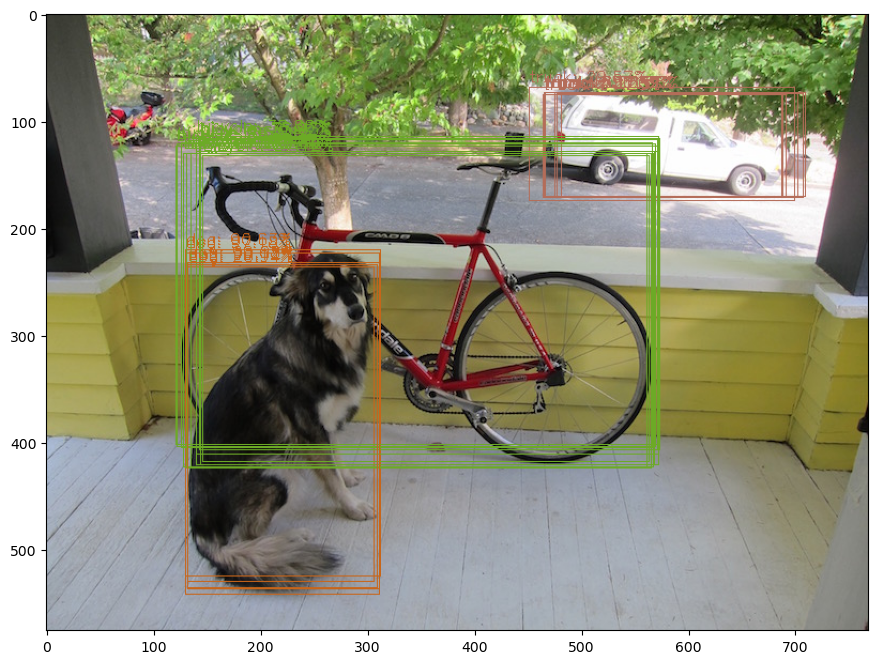

In [7]:
def object_detection_analysis(test_image, obj_detections_in_layers, confidence_threshold): 
 
  # get the image dimensions  
  img_height = test_img.shape[0]
  img_width = test_img.shape[1]
 
  result = test_image.copy()
  
  # loop over each output layer 
  for object_detections_in_single_layer in obj_detections_in_layers:
    # loop over the detections in each layer
      for object_detection in object_detections_in_single_layer:  
        # obj_detection[1]: bbox center pt_x
        # obj_detection[2]: bbox center pt_y
        # obj_detection[3]: bbox width
        # obj_detection[4]: bbox height
        # obj_detection[5]: confidence scores for all detections within the bbox 
 
        # get the confidence scores of all objects detected with the bounding box
        prediction_scores = object_detection[5:]
        
        predicted_class_id = np.argmax(prediction_scores)
        # get the prediction confidence
        prediction_confidence = prediction_scores[predicted_class_id]
    
        # consider object detections with confidence score higher than threshold
        if prediction_confidence > confidence_threshold:
            # get the predicted label
            predicted_class_label = class_labels[predicted_class_id]
            # compute the bounding box coordinates scaled for the input image 
            
            bounding_box = object_detection[0:4] * np.array([img_width, img_height, img_width, img_height])
            # get the bounding box centroid (x,y), width and height as integers
            (box_center_x_pt, box_center_y_pt, box_width, box_height) = bounding_box.astype("int")
            
            start_x_pt = max(0, int(box_center_x_pt - (box_width / 2)))
            start_y_pt = max(0, int(box_center_y_pt - (box_height / 2)))
            end_x_pt = start_x_pt + box_width
            end_y_pt = start_y_pt + box_height
            
            # get a random mask color from the numpy array of colors
            box_color = class_colors[predicted_class_id]
            
            # convert the color numpy array as a list and apply to text and box
            box_color = [int(c) for c in box_color]
            
            # print the prediction in console
            predicted_class_label = "{}: {:.2f}%".format(predicted_class_label, prediction_confidence * 100)
            print("predicted object {}".format(predicted_class_label))
            
            # draw the rectangle and text in the image
            cv2.rectangle(result, (start_x_pt, start_y_pt), (end_x_pt, end_y_pt), box_color, 1)
            cv2.putText(result, predicted_class_label, (start_x_pt, start_y_pt-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, box_color, 1)
  return result
 
confidence_threshold = 0.2
result_raw = object_detection_analysis(test_img, obj_detections_in_layers, confidence_threshold)
 
result_img = cv2.cvtColor(result_raw, cv2.COLOR_BGR2RGB)
plt.imshow(result_img)
plt.show()

In [8]:
class_ids_list = []
boxes_list = []
confidences_list = []

In [9]:
def object_detection_attributes(test_image, obj_detections_in_layers, confidence_threshold):
  # get the image dimensions  
  img_height = test_img.shape[0]
  img_width = test_img.shape[1]
  
  # loop over each output layer 
  for object_detections_in_single_layer in obj_detections_in_layers:
    # loop over the detections in each layer
    for object_detection in object_detections_in_single_layer:  
      # get the confidence scores of all objects detected with the bounding box
      prediction_scores = object_detection[5:]
      # consider the highest score being associated with the winning class
      # get the class ID from the index of the highest score 
      predicted_class_id = np.argmax(prediction_scores)
      # get the prediction confidence
      prediction_confidence = prediction_scores[predicted_class_id]
      
      # consider object detections with confidence score higher than threshold
      if prediction_confidence > confidence_threshold:
        # get the predicted label
        predicted_class_label = class_labels[predicted_class_id]
        # compute the bounding box coordinates scaled for the input image
        bounding_box = object_detection[0:4] * np.array([img_width, img_height, img_width, img_height])
        (box_center_x_pt, box_center_y_pt, box_width, box_height) = bounding_box.astype("int")
        start_x_pt = max(0, int(box_center_x_pt - (box_width / 2)))
        start_y_pt = max(0, int(box_center_y_pt - (box_height / 2)))
        
      
        class_ids_list.append(predicted_class_id)
        confidences_list.append(float(prediction_confidence))
        boxes_list.append([int(start_x_pt), int(start_y_pt), int(box_width), int(box_height)])
        
        print(class_ids_list)
        print('***********************************************************************************************************************')
        print(boxes_list)
        print('***********************************************************************************************************************')
        print(confidences_list)

In [10]:
score_threshold = 0.5
object_detection_attributes(test_img, obj_detections_in_layers, score_threshold)

[7]
***********************************************************************************************************************
[[465, 73, 223, 98]]
***********************************************************************************************************************
[0.8505284786224365]
[7, 7]
***********************************************************************************************************************
[[465, 73, 223, 98], [466, 73, 221, 97]]
***********************************************************************************************************************
[0.8505284786224365, 0.8589067459106445]
[7, 7, 7]
***********************************************************************************************************************
[[465, 73, 223, 98], [466, 73, 221, 97], [466, 73, 222, 97]]
***********************************************************************************************************************
[0.8505284786224365, 0.8589067459106445, 0.8564814925193787]
[7, 7, 7, 16]

predicted object dog: 99.12%
Annotation:  16 0.9911838173866272 132 234 177 302
predicted object bicycle: 98.97%
Annotation:  1 0.9896953105926514 128 130 439 293
predicted object truck: 91.26%
Annotation:  7 0.9126341938972473 464 75 227 96


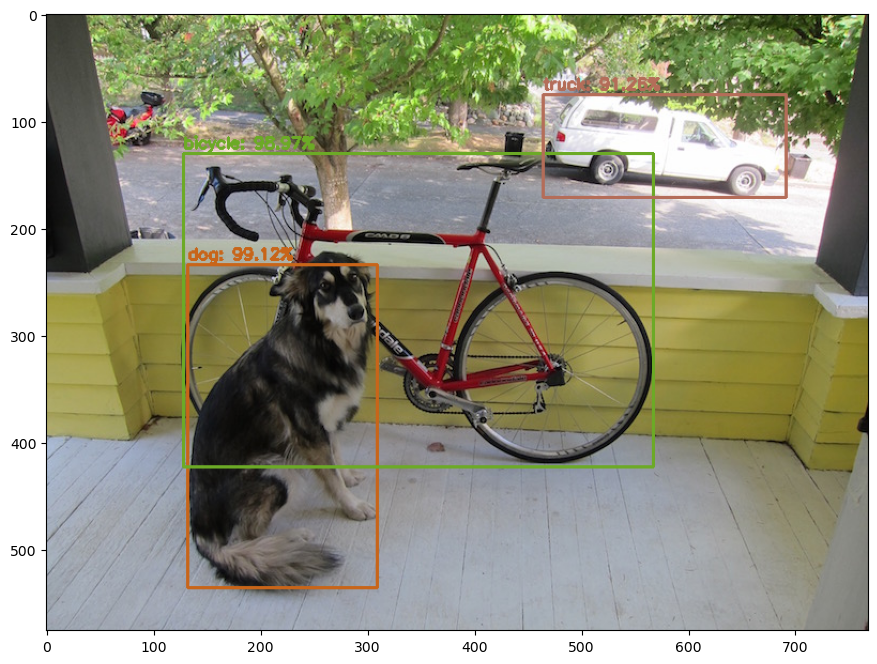

In [13]:
score_threshold = 0.5
nms_threshold = 0.4
winner_ids = cv2.dnn.NMSBoxes(boxes_list, confidences_list, score_threshold, nms_threshold)

# loop through the final set of detections 
for winner_id in winner_ids:
    max_class_id = winner_id
    box = boxes_list[max_class_id]
    start_x_pt = box[0]
    start_y_pt = box[1]
    box_width = box[2]
    box_height = box[3]
    
    #get the predicted class id and label
    predicted_class_id = class_ids_list[max_class_id]
    predicted_class_label = class_labels[predicted_class_id]
    prediction_confidence = confidences_list[max_class_id]
    
    #obtain the bounding box end coordinates
    end_x_pt = start_x_pt + box_width
    end_y_pt = start_y_pt + box_height
    
    #get a random mask color from the numpy array of colors
    box_color = class_colors[predicted_class_id]
    
    #convert the color numpy array as a list and apply to text and box
    box_color = [int(c) for c in box_color]
    
    # print the prediction in console
    predicted_class_label = "{}: {:.2f}%".format(predicted_class_label, prediction_confidence * 100)
    print("predicted object {}".format(predicted_class_label))
    print("Annotation: ",predicted_class_id,prediction_confidence,start_x_pt,start_y_pt,box_width,box_height)
    
    # draw rectangle and text in the image
    cv2.rectangle(test_img, (start_x_pt, start_y_pt), (end_x_pt, end_y_pt), box_color, 2)
    cv2.putText(test_img, predicted_class_label, (start_x_pt, start_y_pt-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, box_color, 2)
    
test_imgz = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


plt.imshow(test_imgz)
plt.show()

In [18]:
print(class_ids_list)
print('***********************************************************************************************************************')
print(boxes_list)
print('***********************************************************************************************************************')
print(confidences_list)

[7, 7, 7, 16, 16, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 16, 16]
***********************************************************************************************************************
[[465, 73, 223, 98], [466, 73, 221, 97], [466, 73, 222, 97], [130, 220, 182, 305], [130, 223, 181, 319], [464, 75, 227, 96], [121, 123, 451, 279], [122, 121, 447, 283], [126, 120, 440, 285], [128, 130, 439, 293], [131, 130, 434, 294], [135, 130, 426, 294], [140, 128, 432, 293], [144, 128, 424, 293], [146, 132, 417, 286], [132, 234, 177, 302], [132, 232, 179, 305]]
***********************************************************************************************************************
[0.8505284786224365, 0.8589067459106445, 0.8564814925193787, 0.9063342213630676, 0.9718268513679504, 0.9126341938972473, 0.8667566180229187, 0.8691300749778748, 0.8680781126022339, 0.9896953105926514, 0.9891595244407654, 0.9865705966949463, 0.8517972230911255, 0.8682835698127747, 0.8712127804756165, 0.9911838173866272, 0.99080592393875

predicted object dog: 99.12%
predicted object bicycle: 98.97%
predicted object truck: 91.26%


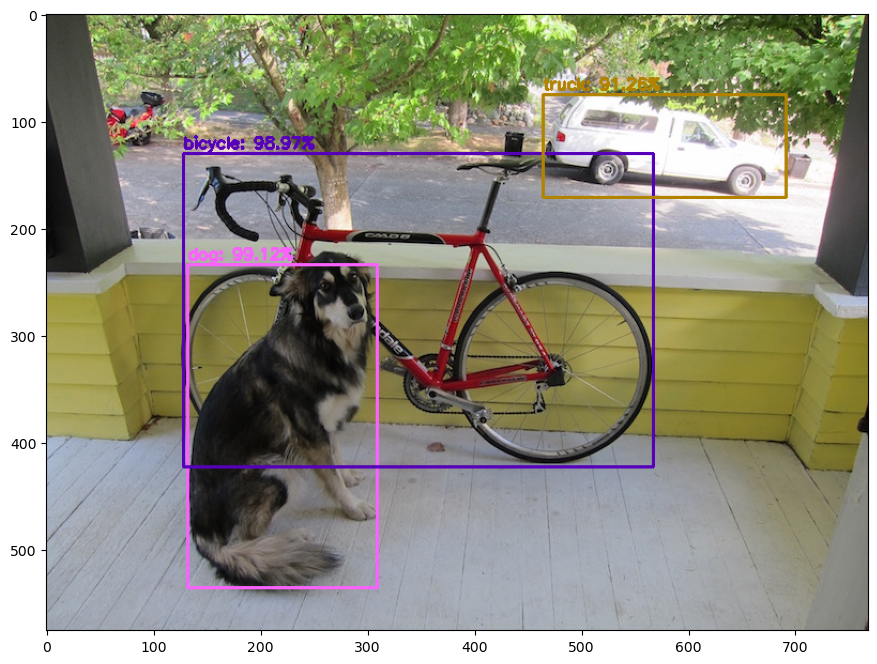

In [23]:
image_pa = "S:/Jupyter_Notebooks/Object Detection/dog.jpg"


score_threshold = 0.5
nms_threshold = 0.4
winner_ids = cv2.dnn.NMSBoxes(boxes_list, confidences_list, score_threshold, nms_threshold)

# Create a directory to store prediction annotation files
output_directory = "S:/Annotation/sample_output_annotations"
os.makedirs(output_directory, exist_ok=True)

# Create a text file to store prediction annotations in YOLO format
annotation_filename = os.path.splitext(os.path.basename(image_pa))[0] + ".txt"
annotation_path = os.path.join(output_directory, annotation_filename)

with open(annotation_path, "w") as annotation_file:
    # loop through the final set of detections 
    for winner_id in winner_ids:
        max_class_id = winner_id
        box = boxes_list[max_class_id]
        start_x_pt = box[0]
        start_y_pt = box[1]
        box_width = box[2]
        box_height = box[3]

        #get the predicted class id and label
        predicted_class_id = class_ids_list[max_class_id]
        predicted_class_label = class_labels[predicted_class_id]
        prediction_confidence = confidences_list[max_class_id]

        # Format: class_id x_center_normalized y_center_normalized width_normalized height_normalized confidence
        annotation = f"{predicted_class_id} {start_x_pt} {start_y_pt} {box_width} {box_height} {prediction_confidence}\n"
        annotation_file.write(annotation)

        #obtain the bounding box end coordinates
        end_x_pt = start_x_pt + box_width
        end_y_pt = start_y_pt + box_height

        #get a random mask color from the numpy array of colors
        box_color = class_colors[predicted_class_id]

        #convert the color numpy array as a list and apply to text and box
        box_color = [int(c) for c in box_color]

        # print the prediction in console
        predicted_class_label = "{}: {:.2f}%".format(predicted_class_label, prediction_confidence * 100)
        print("predicted object {}".format(predicted_class_label))

        # draw rectangle and text in the image
        cv2.rectangle(test_img, (start_x_pt, start_y_pt), (end_x_pt, end_y_pt), box_color, 2)
        cv2.putText(test_img, predicted_class_label, (start_x_pt, start_y_pt-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, box_color, 2)
    
test_imgz = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


plt.imshow(test_imgz)
plt.show()

## Live Video Obejct Detection

In [ ]:

from imageai.Detection import VideoObjectDetection
import os

execution_path = os.getcwd()

detector = VideoObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath( os.path.join(execution_path , "yolov3.pt"))
detector.loadModel()

video_path = detector.detectObjectsFromVideo(input_file_path=os.path.join(execution_path, "input_video.mp4"),
                            output_file_path=os.path.join(execution_path, "people_detected")
                            , frames_per_second=20, log_progress=True)
print(video_path)